In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("combined_alldata.csv")
print(df.shape)

(244115, 118)


In [26]:
for column in df.columns:
    print(column)

Folder Name
File Name
FallType
Nose_X
Nose_Y
Left Eye_X
Left Eye_Y
Right Eye_X
Right Eye_Y
Left Ear_X
Left Ear_Y
Right Ear_X
Right Ear_Y
Left Shoulder_X
Left Shoulder_Y
Right Shoulder_X
Right Shoulder_Y
Left Elbow_X
Left Elbow_Y
Right Elbow_X
Right Elbow_Y
Left Wrist_X
Left Wrist_Y
Right Wrist_X
Right Wrist_Y
Left Hip_X
Left Hip_Y
Right Hip_X
Right Hip_Y
Left Knee_X
Left Knee_Y
Right Knee_X
Right Knee_Y
Left Ankle_X
Left Ankle_Y
Right Ankle_X
Right Ankle_Y
Head_Tilt_Angle
Shoulder_Angle
Left_Torso_Incline_Angle
Right_Torso_Incline_Angle
Left_Elbow_Angle
Right_Elbow_Angle
Left_Hip_Knee_Angle
Right_Hip_Knee_Angle
Left_Knee_Ankle_Angle
Right_Knee_Ankle_Angle
Leg_Spread_Angle
Head_to_Shoulders_Angle
Head_to_Hips_Angle
Nose_X_velocity
Nose_X_acceleration
Nose_Y_velocity
Nose_Y_acceleration
Left Eye_X_velocity
Left Eye_X_acceleration
Left Eye_Y_velocity
Left Eye_Y_acceleration
Right Eye_X_velocity
Right Eye_X_acceleration
Right Eye_Y_velocity
Right Eye_Y_acceleration
Left Ear_X_velocity
Left

In [41]:
# Columns for Min-Max normalization
min_max_columns = [
    'Head_Tilt_Angle', 'Shoulder_Angle', 'Left_Torso_Incline_Angle', 
    'Right_Torso_Incline_Angle', 'Left_Elbow_Angle', 'Right_Elbow_Angle', 
    'Left_Hip_Knee_Angle', 'Right_Hip_Knee_Angle', 'Left_Knee_Ankle_Angle', 
    'Right_Knee_Ankle_Angle', 'Leg_Spread_Angle', 'Head_to_Shoulders_Angle', 
    'Head_to_Hips_Angle'
]

print(len(min_max_columns))

# Columns for Z-Score normalization
z_score_columns = [
    'Nose_X_velocity', 'Nose_X_acceleration', 'Nose_Y_velocity', 
    'Nose_Y_acceleration', 'Left Eye_X_velocity', 'Left Eye_X_acceleration', 
    'Left Eye_Y_velocity', 'Left Eye_Y_acceleration', 'Right Eye_X_velocity', 
    'Right Eye_X_acceleration', 'Right Eye_Y_velocity', 'Right Eye_Y_acceleration', 
    'Left Ear_X_velocity', 'Left Ear_X_acceleration', 'Left Ear_Y_velocity', 
    'Left Ear_Y_acceleration', 'Right Ear_X_velocity', 'Right Ear_X_acceleration', 
    'Right Ear_Y_velocity', 'Right Ear_Y_acceleration', 'Left Shoulder_X_velocity', 
    'Left Shoulder_X_acceleration', 'Left Shoulder_Y_velocity', 
    'Left Shoulder_Y_acceleration', 'Right Shoulder_X_velocity', 
    'Right Shoulder_X_acceleration', 'Right Shoulder_Y_velocity', 
    'Right Shoulder_Y_acceleration', 'Left Elbow_X_velocity', 
    'Left Elbow_X_acceleration', 'Left Elbow_Y_velocity', 
    'Left Elbow_Y_acceleration', 'Right Elbow_X_velocity', 
    'Right Elbow_X_acceleration', 'Right Elbow_Y_velocity', 
    'Right Elbow_Y_acceleration', 'Left Wrist_X_velocity', 
    'Left Wrist_X_acceleration', 'Left Wrist_Y_velocity', 
    'Left Wrist_Y_acceleration', 'Right Wrist_X_velocity', 
    'Right Wrist_X_acceleration', 'Right Wrist_Y_velocity', 
    'Right Wrist_Y_acceleration', 'Left Hip_X_velocity', 
    'Left Hip_X_acceleration', 'Left Hip_Y_velocity', 
    'Left Hip_Y_acceleration', 'Right Hip_X_velocity', 
    'Right Hip_X_acceleration', 'Right Hip_Y_velocity', 
    'Right Hip_Y_acceleration', 'Left Knee_X_velocity', 
    'Left Knee_X_acceleration', 'Left Knee_Y_velocity', 
    'Left Knee_Y_acceleration', 'Right Knee_X_velocity', 
    'Right Knee_X_acceleration', 'Right Knee_Y_velocity', 
    'Right Knee_Y_acceleration', 'Left Ankle_X_velocity', 
    'Left Ankle_X_acceleration', 'Left Ankle_Y_velocity', 
    'Left Ankle_Y_acceleration', 'Right Ankle_X_velocity', 
    'Right Ankle_X_acceleration', 'Right Ankle_Y_velocity', 
    'Right Ankle_Y_acceleration'
]

remove_columns = ['Left Eye_X',"Left Eye_Y","Right Eye_X"
,"Right Eye_Y"
,"Left Ear_X"
,"Left Ear_Y"
,"Right Ear_X"
,"Right Ear_Y",'Head_Tilt_Angle','Leg_Spread_Angle']


13


In [28]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Calculate IQR

    # Check if IQR is very small to prevent excessive capping
    if IQR == 0:
        print(f"IQR is zero for column '{column}'. No outliers will be removed.")
        return df  # No outlier removal if IQR is 0

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

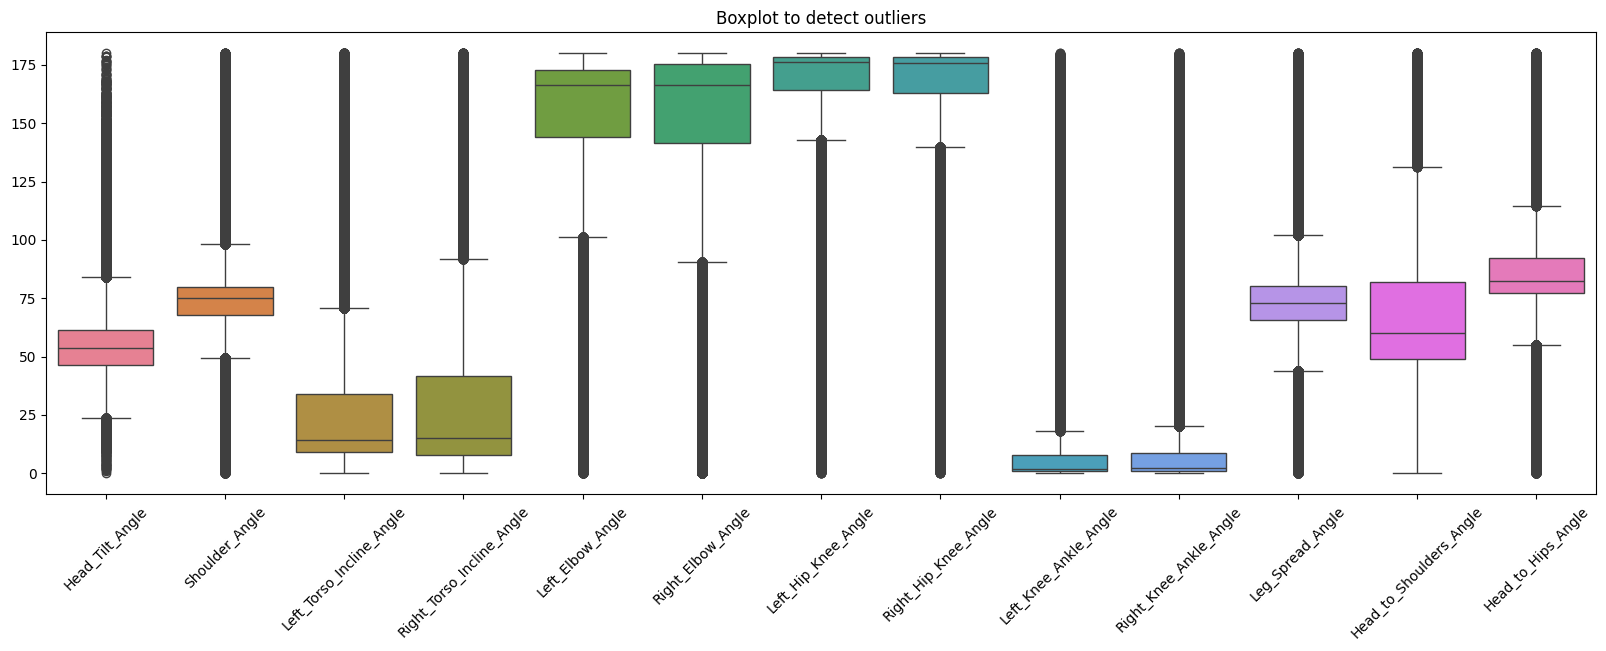

Outliers removed or capped


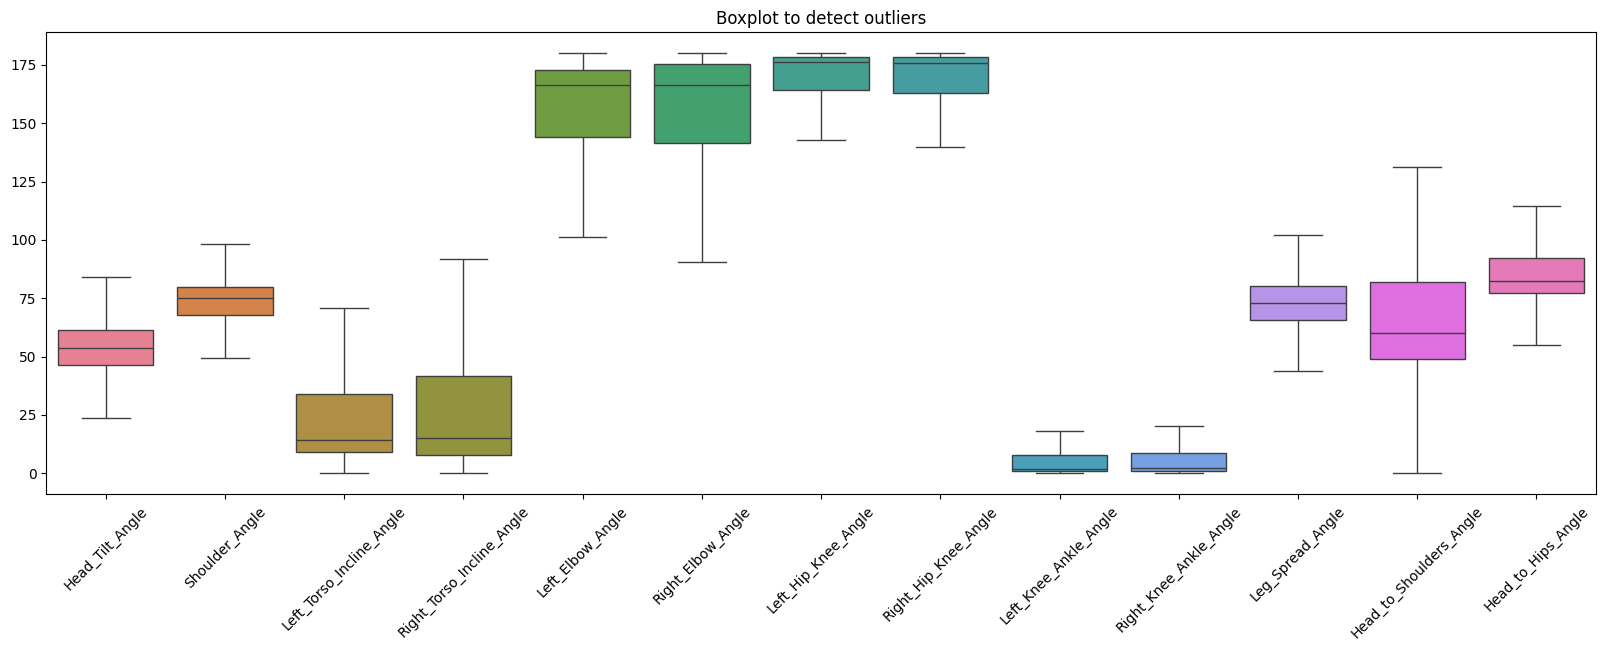

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# df = df.head(500)
# Assume 'df' is your DataFrame and 'column_name' is the column you want to check for outliers
plt.figure(figsize=(20, 6))
sns.boxplot(data=df[min_max_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=45)  # Rotate column names if necessary
plt.show()

# Apply the IQR method to each column in the list
for col in min_max_columns:
    df = remove_outliers_iqr(df, col)

print("Outliers removed or capped")

plt.figure(figsize=(20, 6))
sns.boxplot(data=df[min_max_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=45)  # Rotate column names if necessary
plt.show()

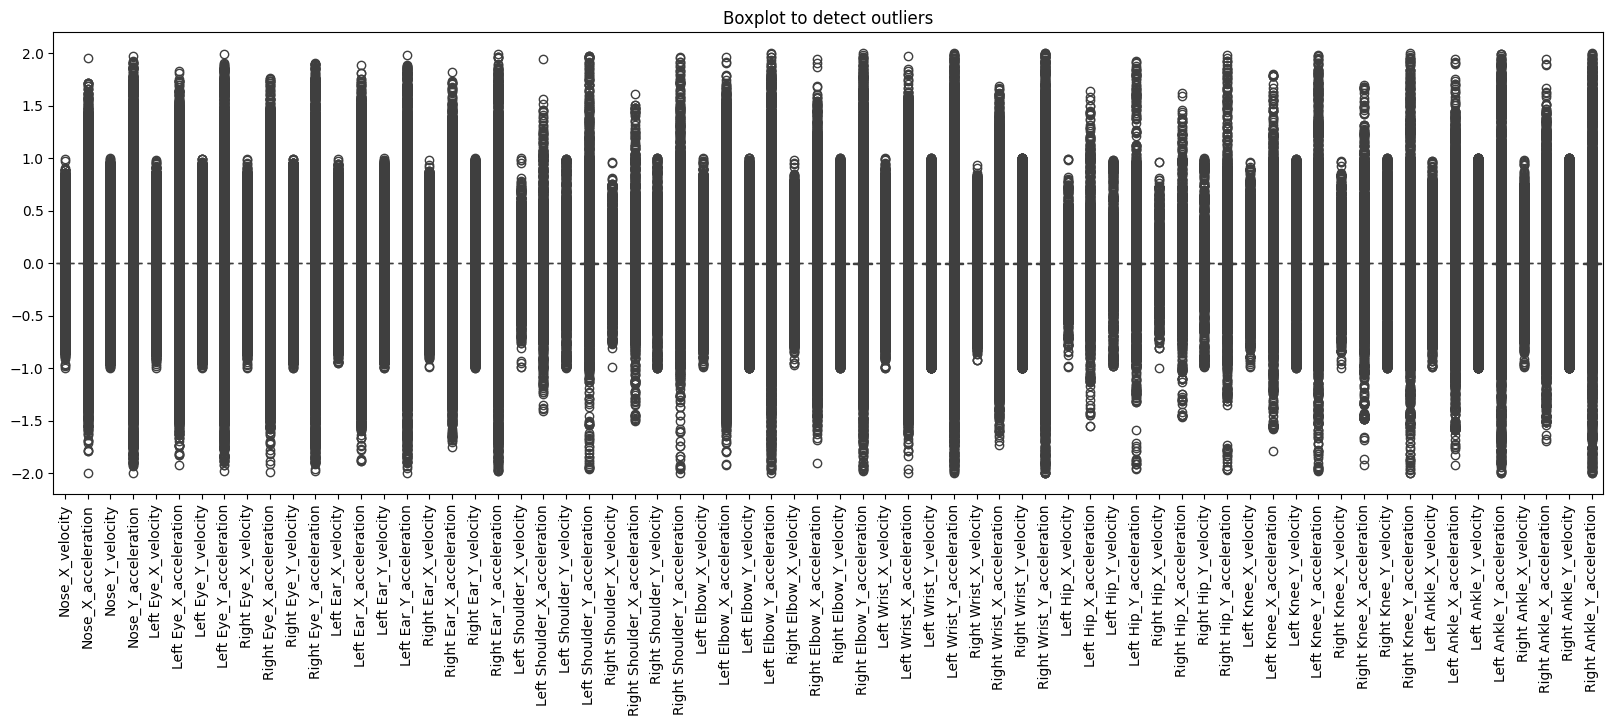

IQR is zero for column 'Right Ear_X_velocity'. No outliers will be removed.
IQR is zero for column 'Right Ear_X_acceleration'. No outliers will be removed.
IQR is zero for column 'Right Ear_Y_velocity'. No outliers will be removed.
IQR is zero for column 'Right Ear_Y_acceleration'. No outliers will be removed.
Outliers removed or capped


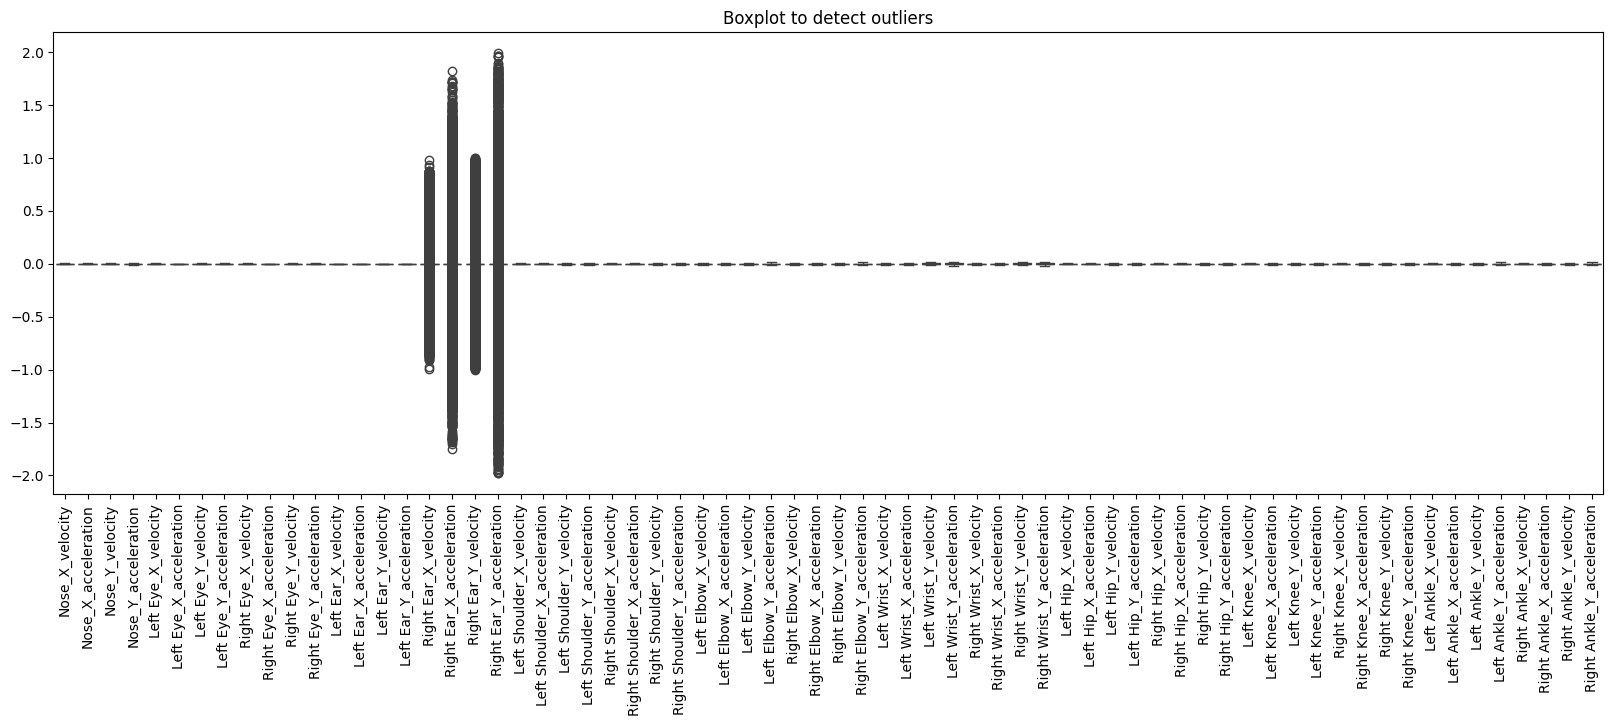

In [30]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df[z_score_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()

# Apply the IQR method to each column in the list
for col in z_score_columns:
    df = remove_outliers_iqr(df, col)

print("Outliers removed or capped")

plt.figure(figsize=(20, 6))
sns.boxplot(data=df[z_score_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()

68
                            Folder Name    File Name  FallType  Nose_X  \
0  Footage100_CAUCAFDD_Subject_9_Fall_5   Frame1.jpg         0     0.0   
1  Footage100_CAUCAFDD_Subject_9_Fall_5  Frame10.jpg         0     0.0   
2  Footage100_CAUCAFDD_Subject_9_Fall_5  Frame11.jpg         0     0.0   
3  Footage100_CAUCAFDD_Subject_9_Fall_5  Frame12.jpg         0     0.0   
4  Footage100_CAUCAFDD_Subject_9_Fall_5  Frame13.jpg         0     0.0   

   Nose_Y  Left Eye_X  Left Eye_Y  Right Eye_X  Right Eye_Y  Left Ear_X  ...  \
0     0.0         0.0         0.0          0.0          0.0    0.378424  ...   
1     0.0         0.0         0.0          0.0          0.0    0.383426  ...   
2     0.0         0.0         0.0          0.0          0.0    0.385965  ...   
3     0.0         0.0         0.0          0.0          0.0    0.393991  ...   
4     0.0         0.0         0.0          0.0          0.0    0.395612  ...   

   Right Knee_Y_velocity  Right Knee_Y_acceleration  Left Ankle_X_veloc

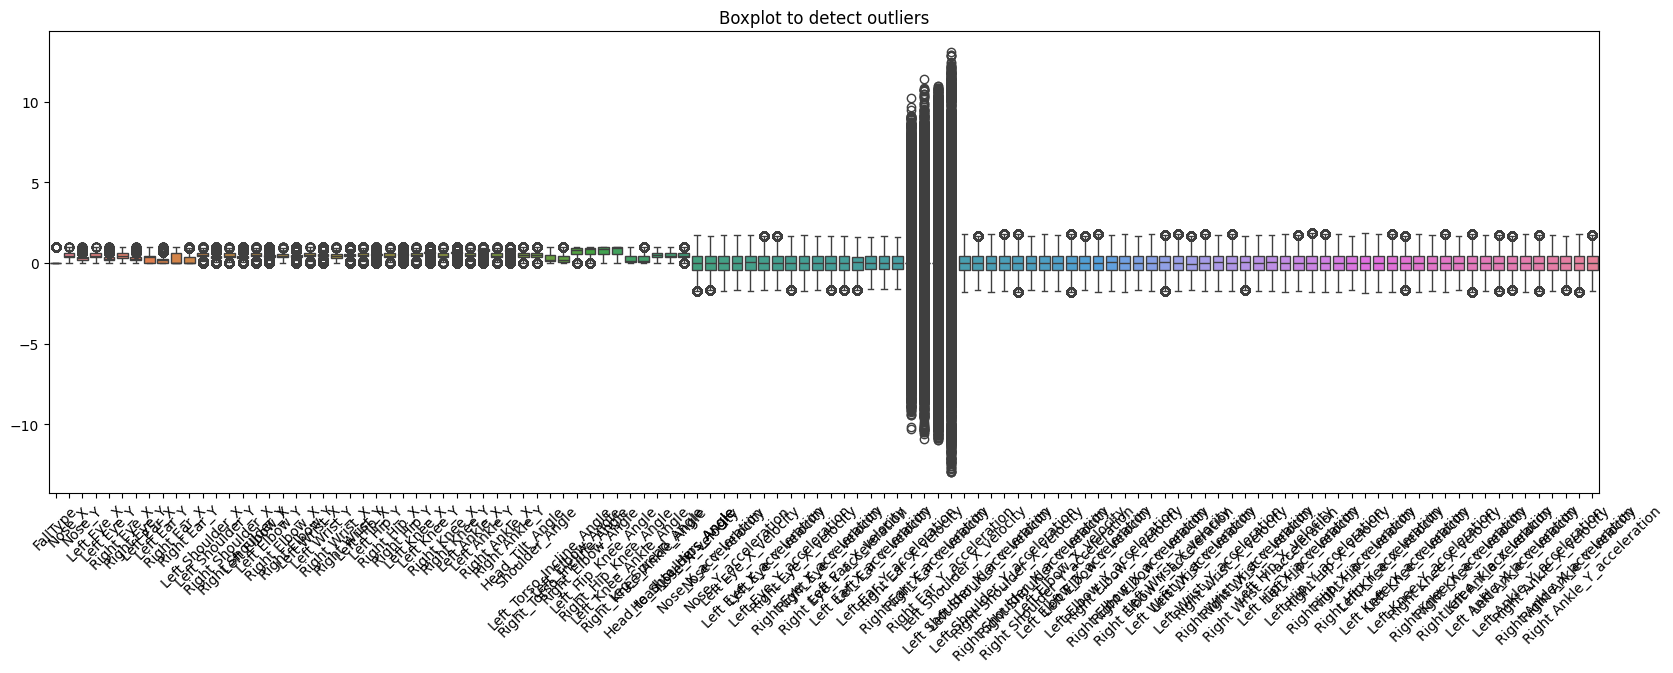

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data: Replace this with your actual DataFrame
# df = pd.read_csv('your_data.csv')

print(len(z_score_columns))

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df[min_max_columns] = min_max_scaler.fit_transform(df[min_max_columns])

# Z-Score Normalization
z_score_scaler = StandardScaler()
df[z_score_columns] = z_score_scaler.fit_transform(df[z_score_columns])

# Now df contains the normalized columns
print(df.head())

plt.figure(figsize=(20, 6))
sns.boxplot(data=df)  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=45)  # Rotate column names if necessary
plt.show()

df.to_csv("new_normalized_all.csv", index=False)

In [32]:
from scipy.stats import zscore
# Calculate Z-scores for the specified columns
z_scores = df[z_score_columns].apply(zscore)

# Identify outliers for each column (Z-score > 3 or < -3)
outliers = {}
for column in z_score_columns:
    outliers[column] = df[(z_scores[column] > 3) | (z_scores[column] < -3)]

# Print outliers for each column
for column, outlier_data in outliers.items():
    print(f'Outliers for {column}:\n', outlier_data)

Outliers for Nose_X_velocity:
 Empty DataFrame
Columns: [Folder Name, File Name, FallType, Nose_X, Nose_Y, Left Eye_X, Left Eye_Y, Right Eye_X, Right Eye_Y, Left Ear_X, Left Ear_Y, Right Ear_X, Right Ear_Y, Left Shoulder_X, Left Shoulder_Y, Right Shoulder_X, Right Shoulder_Y, Left Elbow_X, Left Elbow_Y, Right Elbow_X, Right Elbow_Y, Left Wrist_X, Left Wrist_Y, Right Wrist_X, Right Wrist_Y, Left Hip_X, Left Hip_Y, Right Hip_X, Right Hip_Y, Left Knee_X, Left Knee_Y, Right Knee_X, Right Knee_Y, Left Ankle_X, Left Ankle_Y, Right Ankle_X, Right Ankle_Y, Head_Tilt_Angle, Shoulder_Angle, Left_Torso_Incline_Angle, Right_Torso_Incline_Angle, Left_Elbow_Angle, Right_Elbow_Angle, Left_Hip_Knee_Angle, Right_Hip_Knee_Angle, Left_Knee_Ankle_Angle, Right_Knee_Ankle_Angle, Leg_Spread_Angle, Head_to_Shoulders_Angle, Head_to_Hips_Angle, Nose_X_velocity, Nose_X_acceleration, Nose_Y_velocity, Nose_Y_acceleration, Left Eye_X_velocity, Left Eye_X_acceleration, Left Eye_Y_velocity, Left Eye_Y_acceleration, R

In [50]:
import pandas as pd
import re

# Load your dataset
df = pd.read_csv('Experiment_df_balanced_removedBMLV.csv')  # Replace with your dataset path

# Function to extract numeric part from the filename
def extract_numeric(filename):
    match = re.search(r'\d+', filename)
    return int(match.group()) if match else float('inf')  # Return a large number if no match

# Create a new column for sorting
df['Numeric File Name'] = df['File Name'].apply(extract_numeric)

# Sort the dataset by 'Folder Name' and then by the new 'Numeric File Name'
sorted_df = df.sort_values(by=['Folder Name', 'Numeric File Name'])

# Optionally, drop the helper column if not needed
sorted_df.drop(columns=['Numeric File Name'], inplace=True)

# Optionally, reset the index if needed
sorted_df.reset_index(drop=True, inplace=True)

# Display the sorted DataFrame
print(sorted_df.head)
sorted_df.to_csv("Experiment_df_balanced_removedBMLV_sorted.csv", index=False)


<bound method NDFrame.head of                                 Folder Name            File Name  FallType  \
0      Footage100_CAUCAFDD_Subject_9_Fall_5           Frame1.jpg         0   
1      Footage100_CAUCAFDD_Subject_9_Fall_5           Frame4.jpg         0   
2      Footage100_CAUCAFDD_Subject_9_Fall_5           Frame5.jpg         0   
3      Footage100_CAUCAFDD_Subject_9_Fall_5           Frame7.jpg         0   
4      Footage100_CAUCAFDD_Subject_9_Fall_5           Frame8.jpg         0   
...                                     ...                  ...       ...   
34121     footage9-Index(RGB)-731-no_fall_9  rgb_1455_result.jpg         0   
34122     footage9-Index(RGB)-731-no_fall_9  rgb_1457_result.jpg         0   
34123     footage9-Index(RGB)-731-no_fall_9  rgb_1458_result.jpg         0   
34124     footage9-Index(RGB)-731-no_fall_9  rgb_1461_result.jpg         0   
34125     footage9-Index(RGB)-731-no_fall_9  rgb_1462_result.jpg         0   

         Nose_X    Nose_Y  Left S

In [48]:
import pandas as pd


# Assuming your DataFrame is named 'df' and has a column 'Folder Name'
df = pd.read_csv("Experiment_df.csv")
print(df.shape)
df = df[~df['Folder Name'].str.contains('BMLV', na=False)]
print(df.shape)
df.to_csv("Experiment_df_removedBMLV.csv", index=False)

(244115, 66)
(53433, 66)


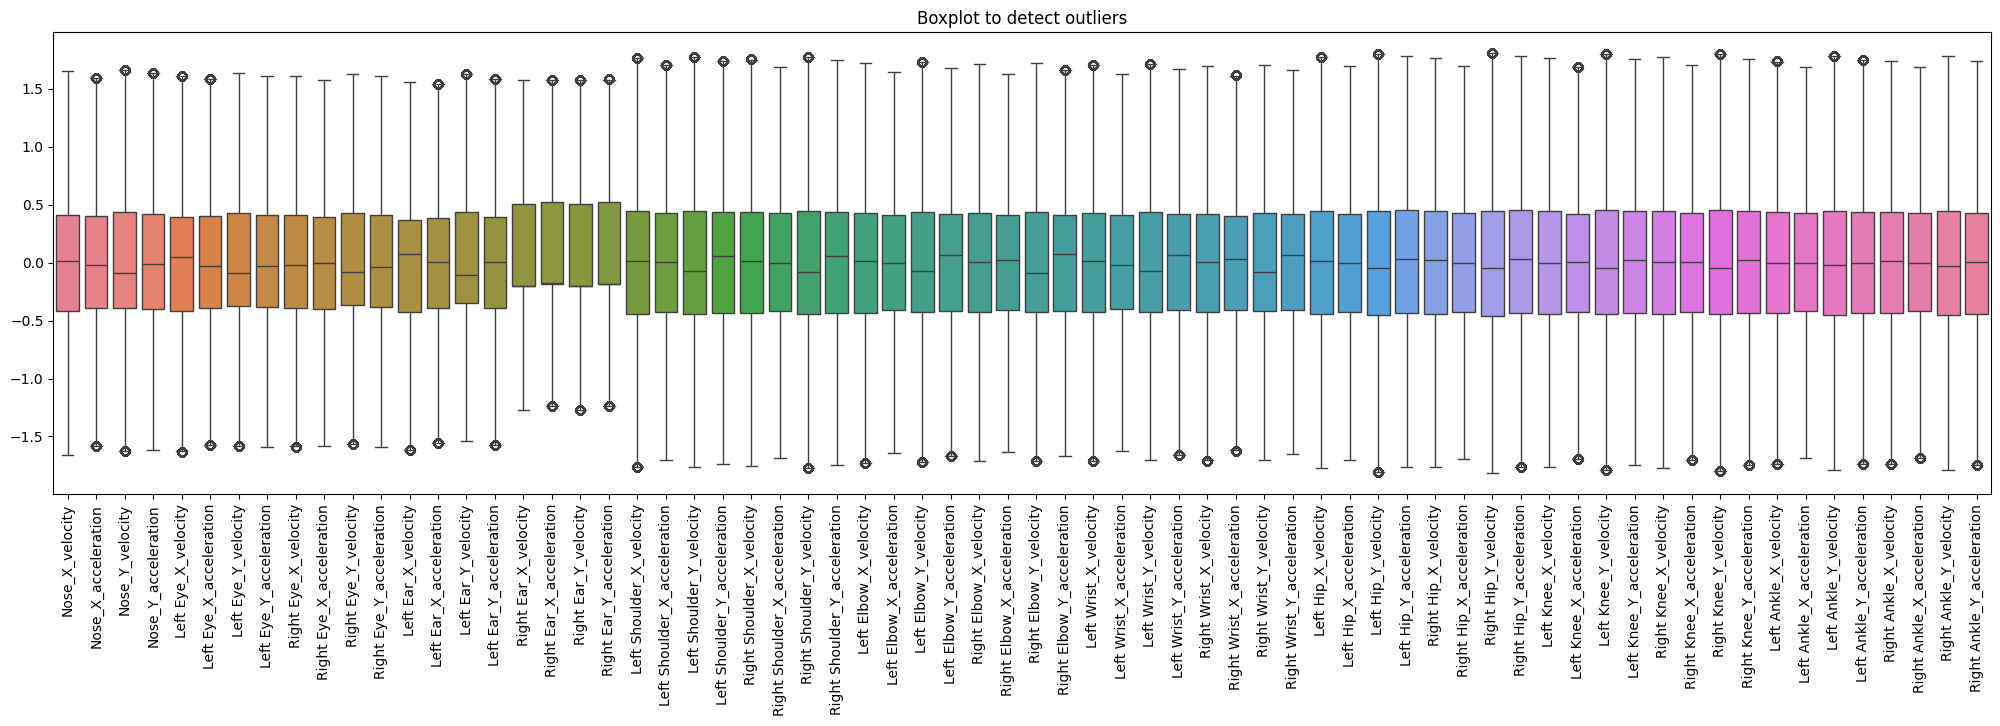

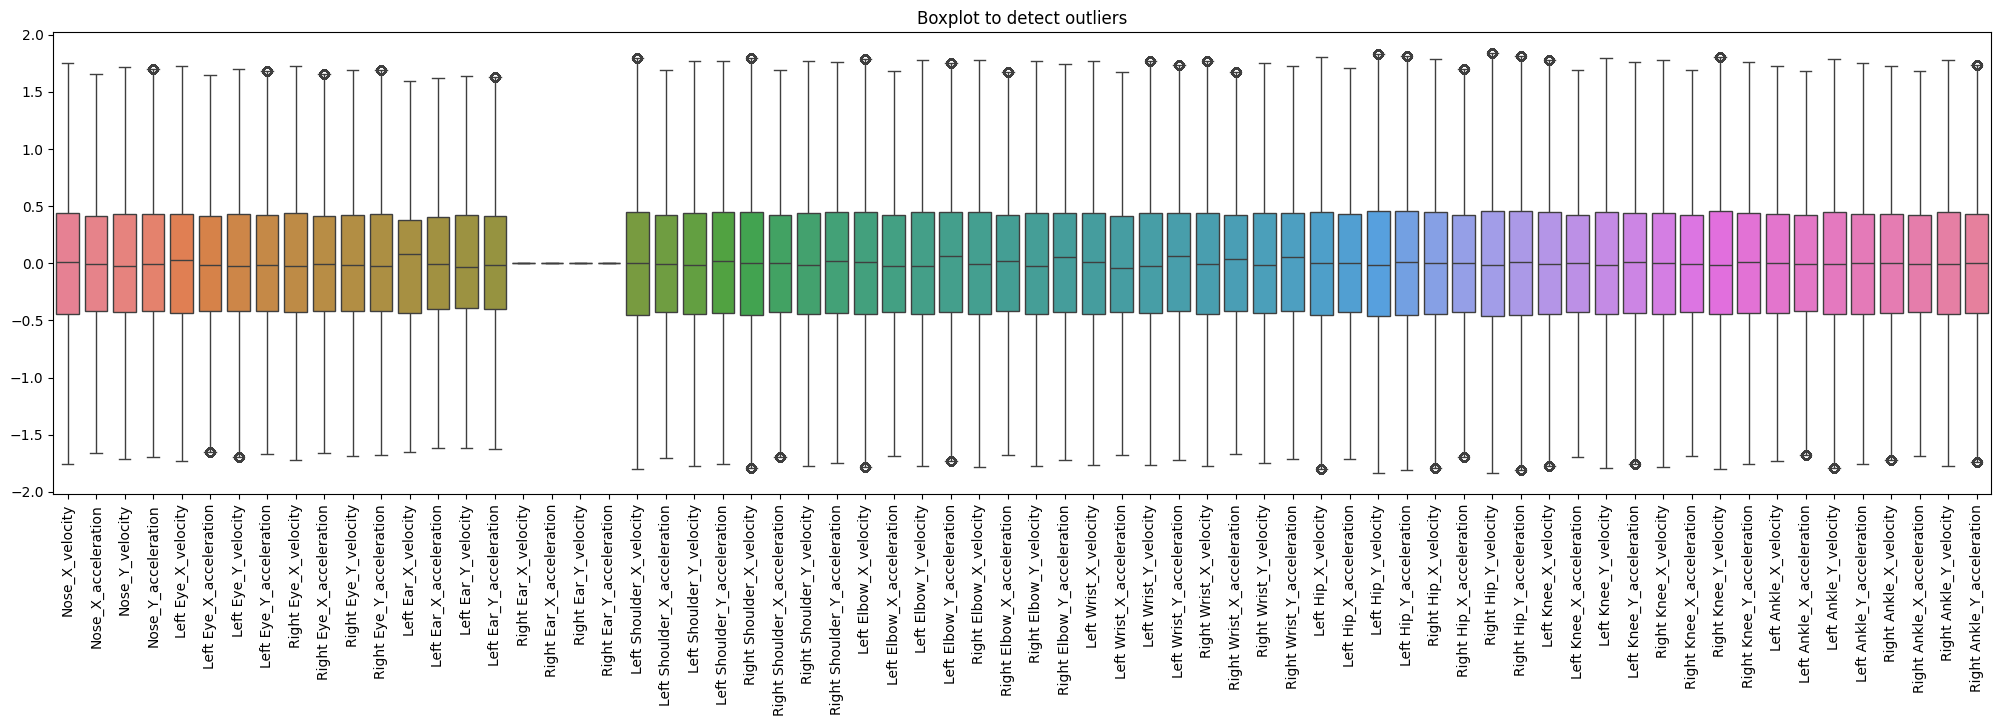

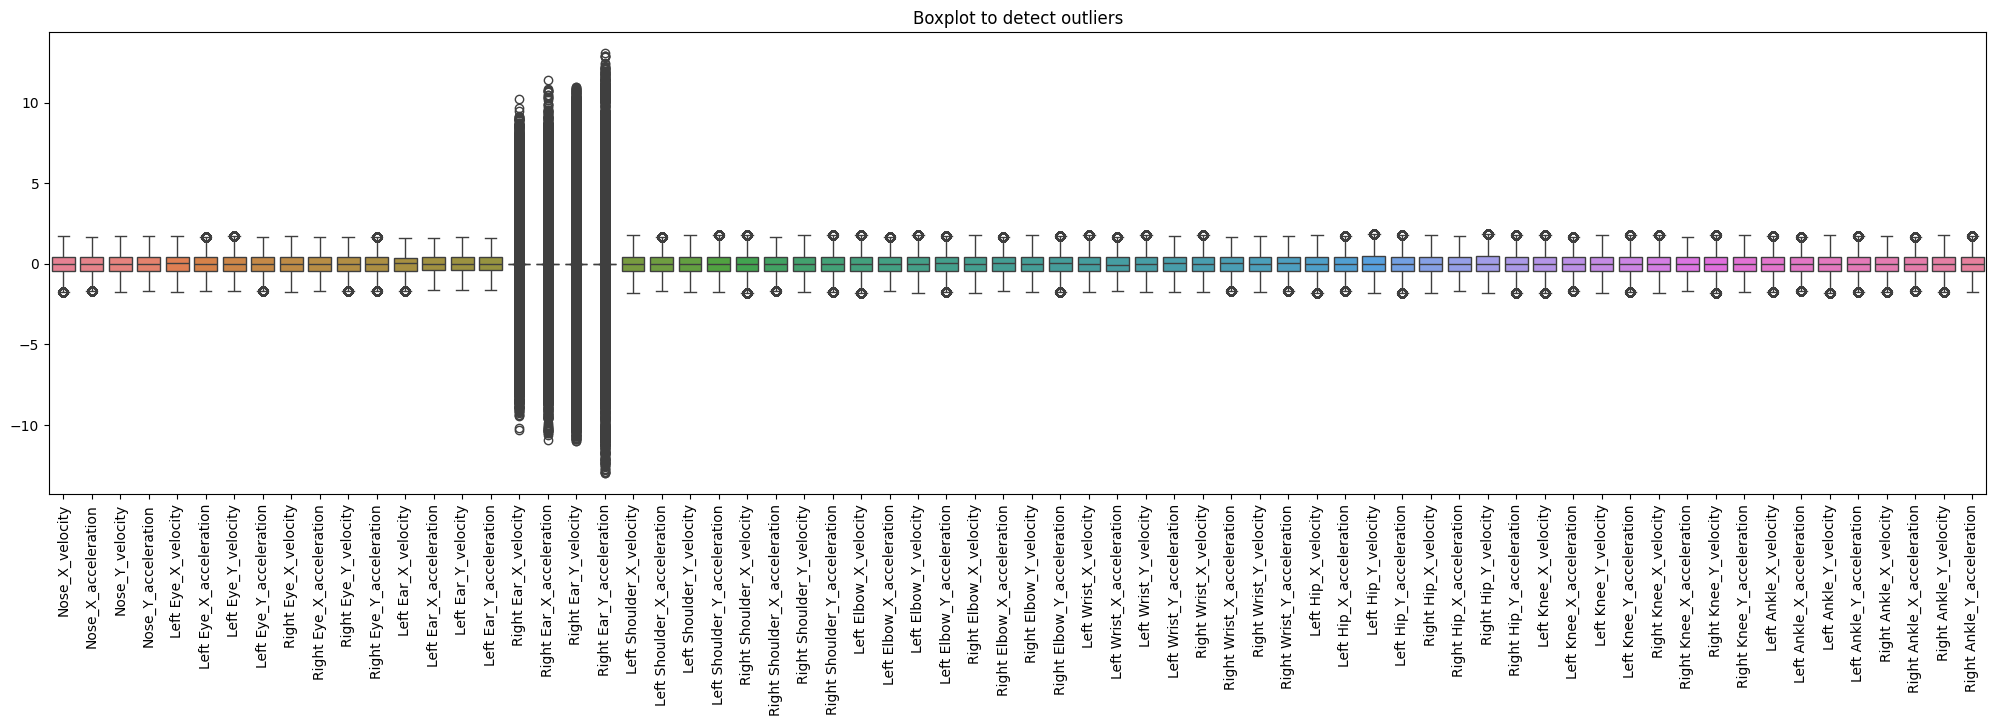

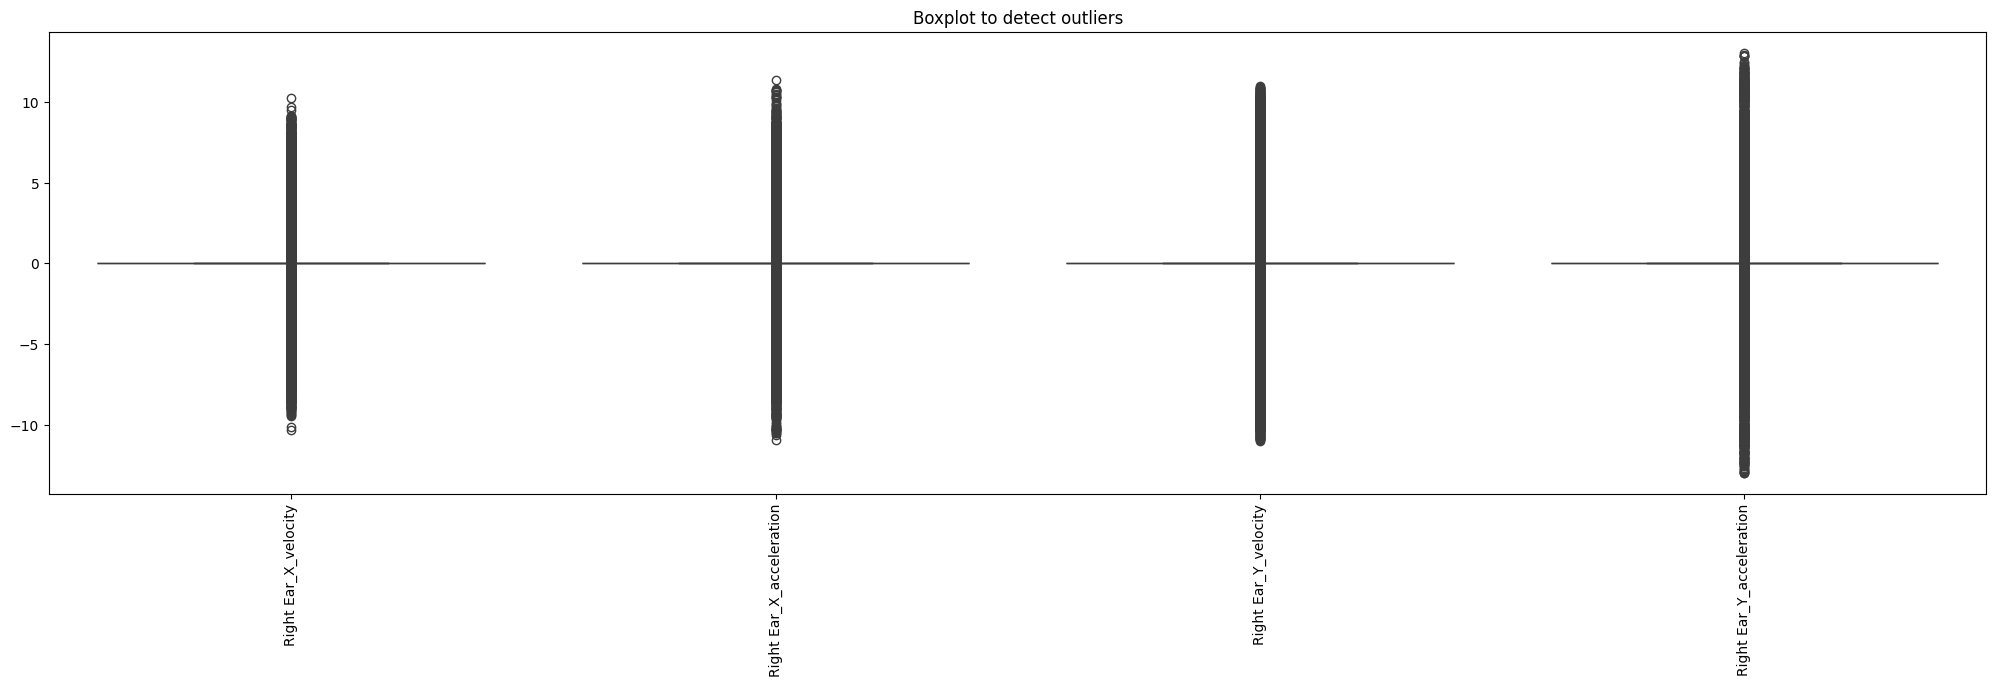

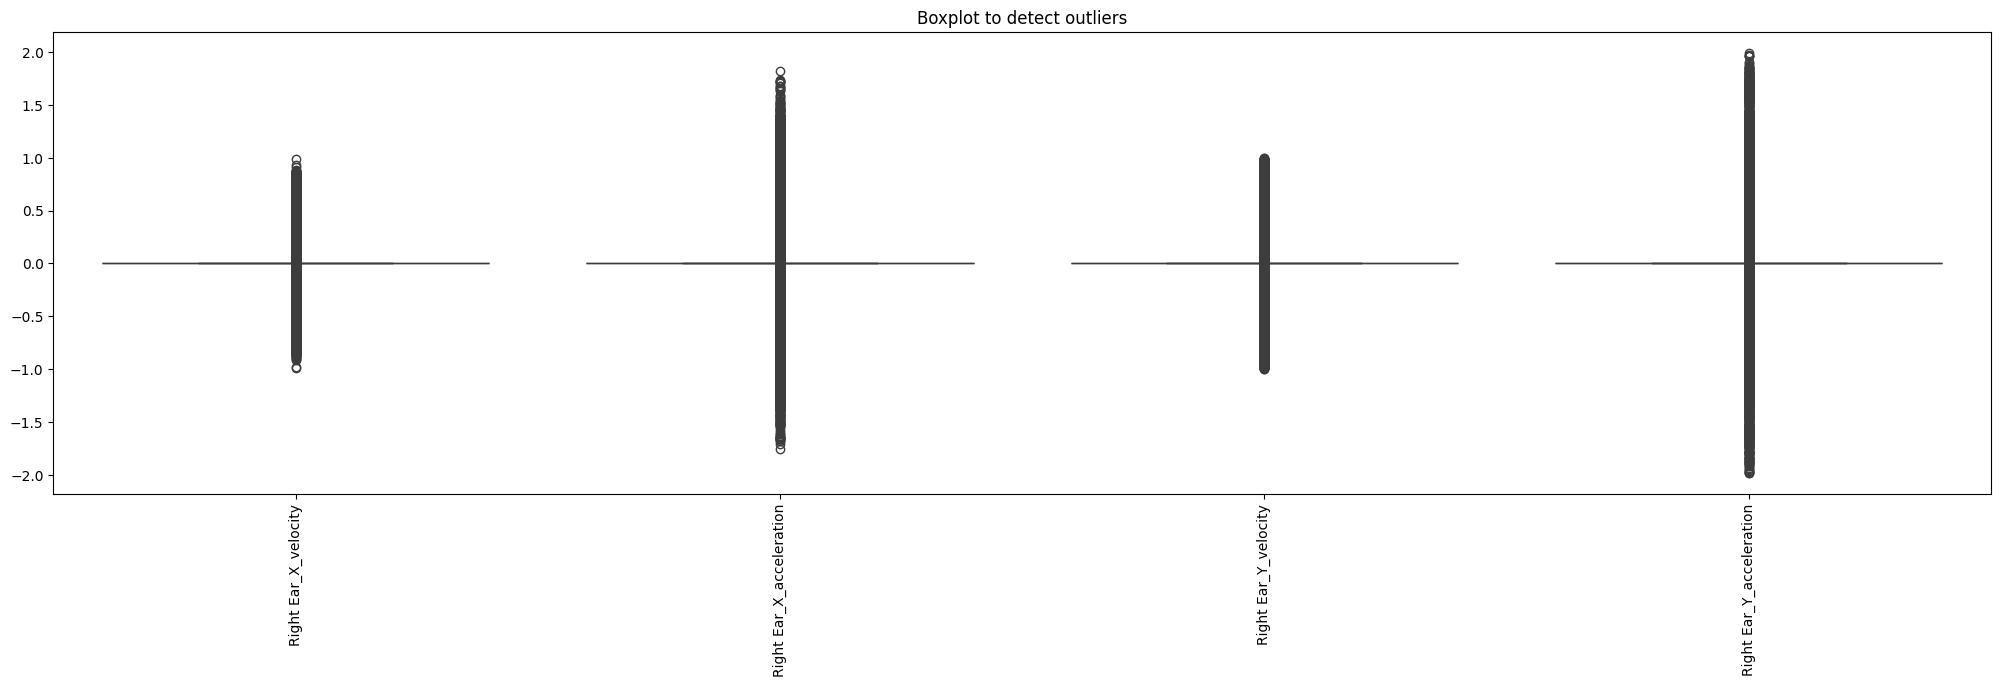

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Assuming your DataFrame is named 'df' and has a column 'Folder Name'
# df = pd.read_csv("sorted_allbalanced_norm_removeBMLV.csv")
# plt.figure(figsize=(25, 6))
# sns.boxplot(data=df[z_score_columns])  # Adjust with your columns of interest
# plt.title('Boxplot to detect outliers')
# plt.xticks(rotation=90)  # Rotate column names if necessary
# plt.show()

df = pd.read_csv("Dataset Archive 30092024/sorted_allbalanced_norm.csv")
plt.figure(figsize=(25, 6))
sns.boxplot(data=df[z_score_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()

df = pd.read_csv("Dataset Archive 30092024/combined_norm.csv")
plt.figure(figsize=(25, 6))
sns.boxplot(data=df[z_score_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()

df = pd.read_csv("sorted_new_normalized_all.csv")
plt.figure(figsize=(25, 6))
sns.boxplot(data=df[z_score_columns])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()

# df = pd.read_csv("combined_alldata.csv")
# plt.figure(figsize=(25, 6))
# sns.boxplot(data=df)  # Adjust with your columns of interest
# plt.title('Boxplot to detect outliers')
# plt.xticks(rotation=90)  # Rotate column names if necessary
# plt.show()

selected = ['Right Ear_X_velocity', 'Right Ear_X_acceleration', 
    'Right Ear_Y_velocity', 'Right Ear_Y_acceleration']

df = pd.read_csv("sorted_new_normalized_all.csv")
plt.figure(figsize=(25, 6))
sns.boxplot(data=df[selected])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()

df[selected].to_csv("test1.csv", index=False)

df = pd.read_csv("combined_alldata.csv")
plt.figure(figsize=(25, 6))
sns.boxplot(data=df[selected])  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()
df[selected].to_csv("test2.csv", index=False)

(244115, 66)
Index(['Folder Name', 'File Name', 'FallType', 'Nose_X', 'Nose_Y',
       'Left Shoulder_X', 'Left Shoulder_Y', 'Right Shoulder_X',
       'Right Shoulder_Y', 'Left Elbow_X', 'Left Elbow_Y', 'Right Elbow_X',
       'Right Elbow_Y', 'Left Wrist_X', 'Left Wrist_Y', 'Right Wrist_X',
       'Right Wrist_Y', 'Left Hip_X', 'Left Hip_Y', 'Right Hip_X',
       'Right Hip_Y', 'Left Knee_X', 'Left Knee_Y', 'Right Knee_X',
       'Right Knee_Y', 'Left Ankle_X', 'Left Ankle_Y', 'Right Ankle_X',
       'Right Ankle_Y', 'Shoulder_Angle', 'Left_Torso_Incline_Angle',
       'Right_Torso_Incline_Angle', 'Left_Elbow_Angle', 'Right_Elbow_Angle',
       'Left_Hip_Knee_Angle', 'Right_Hip_Knee_Angle', 'Left_Knee_Ankle_Angle',
       'Right_Knee_Ankle_Angle', 'Head_to_Shoulders_Angle',
       'Head_to_Hips_Angle', 'Nose_X_acceleration', 'Nose_Y_acceleration',
       'Left Shoulder_X_acceleration', 'Left Shoulder_Y_acceleration',
       'Right Shoulder_X_acceleration', 'Right Shoulder_Y_accelerat

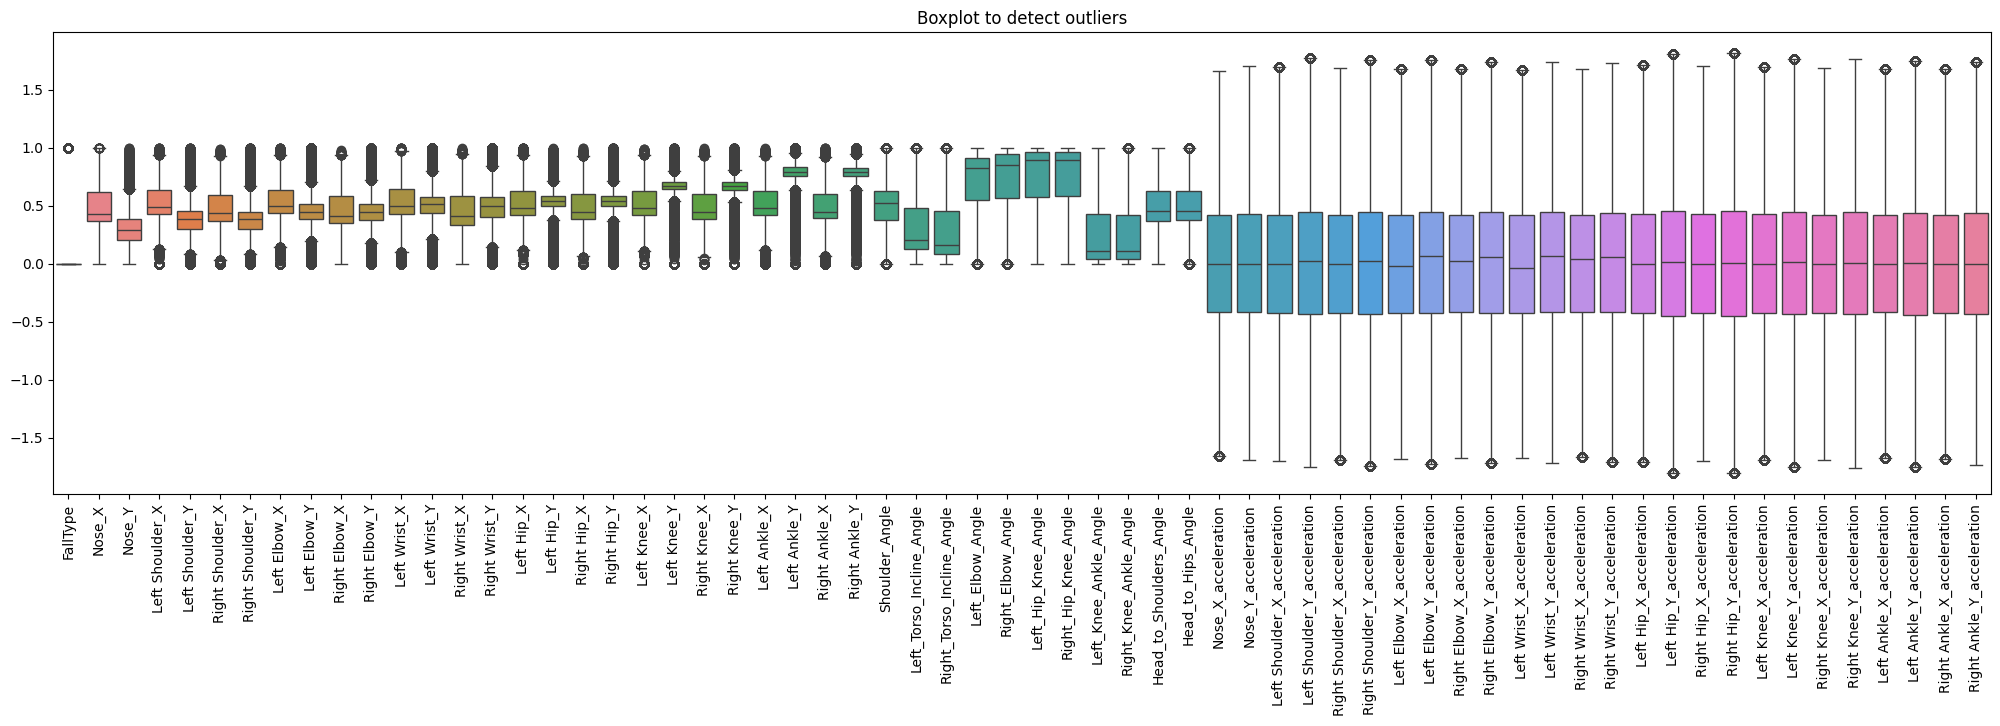

In [47]:
df = pd.read_csv("sorted_new_normalized_all.csv")

df = df.drop(columns=[col for col in df.columns if 'velocity' in col])
df = df.drop(columns=remove_columns)
df = df.drop(columns=[col for col in df.columns if 'Right Ear' in col])
df = df.drop(columns=[col for col in df.columns if 'Left Ear' in col])
df = df.drop(columns=[col for col in df.columns if 'Right Eye' in col])
df = df.drop(columns=[col for col in df.columns if 'Left Eye' in col])
print(df.shape)
print(df.columns)

df.to_csv("Experiment_df.csv", index=False)

plt.figure(figsize=(25, 6))
sns.boxplot(data=df)  # Adjust with your columns of interest
plt.title('Boxplot to detect outliers')
plt.xticks(rotation=90)  # Rotate column names if necessary
plt.show()
# df[selected].to_csv("test2.csv", index=False)



In [54]:
df = pd.read_csv("Experiment_df.csv")
filtered_df = df[df['FallType'] == 1]
filtered_df.shape

filtered_df.to_csv("Fall.csv", index=False)